 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns = pd.read_csv('Resources/whale_returns.csv')


In [3]:
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [4]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)


In [6]:
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv('Resources/algo_returns.csv')



In [8]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_close = pd.read_csv("Resources/sp_tsx_history.csv")

In [11]:
# Check Data Types
sp_close.dtypes


Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sp_close['Date']=pd.to_datetime(sp_close['Date'])   
sp_close["Close"]=sp_close["Close"].str.replace("$","")
sp_close["Close"]=sp_close["Close"].str.replace(",","")
sp_close["Close"]=sp_close["Close"].astype(float)

C:\Users\sc\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
sp_close

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [14]:
# Calculate Daily Returns
sp_close['Daily Return'] = sp_close['Close'].pct_change()

In [15]:
sp_close

,Date,Close,Daily Return
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


In [16]:
# Drop nulls
sp_close.dropna(inplace=True)

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp_close.rename(columns={'Close':'SP_Close'},inplace=True)


In [18]:
sp_close.rename(columns={'Daily Return':'S&P TSX'},inplace=True)

In [19]:
sp_close

,Date,SP_Close,S&P TSX
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
5,2012-10-09,12273.57,-0.011709
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [21]:
whale_returns["Date"]=pd.to_datetime(whale_returns["Date"])
whale_returns.set_index("Date",inplace=True)

In [22]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [23]:
algo_returns

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [24]:
algo_returns["Date"]=pd.to_datetime(algo_returns["Date"])
algo_returns.set_index("Date",inplace=True)

In [25]:
sp_close.set_index("Date",inplace=True)


In [26]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [27]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [28]:
sp_close

,SP_Close,S&P TSX
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_merged=pd.merge(whale_returns,algo_returns,how='inner',left_index=True,right_index=True)

In [30]:
df_merged=pd.merge(df_merged,sp_close,how='inner',left_index=True,right_index=True)

In [31]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [32]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX'],
      dtype='object')

In [33]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788


Text(0, 0.5, 'Daily Return(%)')

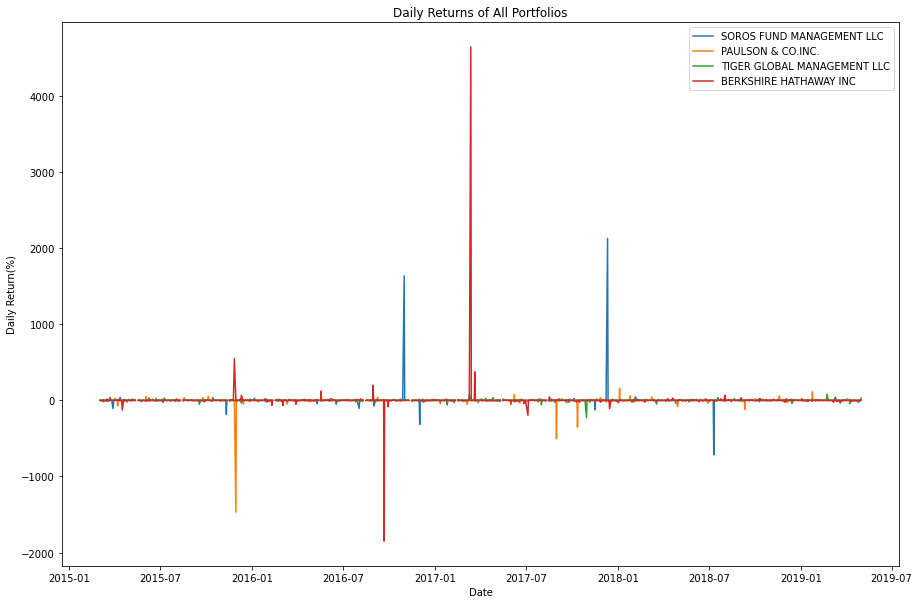

In [34]:
# Plot daily returns of all portfolios
plt.figure(figsize=(15,10))
plt.plot(df_merged['SOROS FUND MANAGEMENT LLC'].pct_change(),label='SOROS FUND MANAGEMENT LLC')
plt.plot(df_merged['PAULSON & CO.INC. '].pct_change(),label='PAULSON & CO.INC. ')
plt.plot(df_merged['TIGER GLOBAL MANAGEMENT LLC'].pct_change(),label='TIGER GLOBAL MANAGEMENT LLC')
plt.plot(df_merged['BERKSHIRE HATHAWAY INC'].pct_change(),label='BERKSHIRE HATHAWAY INC')
plt.legend()
plt.title("Daily Returns of All Portfolios")
plt.xlabel("Date")
plt.ylabel("Daily Return(%)")

#### Calculate and Plot cumulative returns.

In [35]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX'],
      dtype='object')

Text(0.5, 1.0, 'Cumulative Returns of All Portfolios')

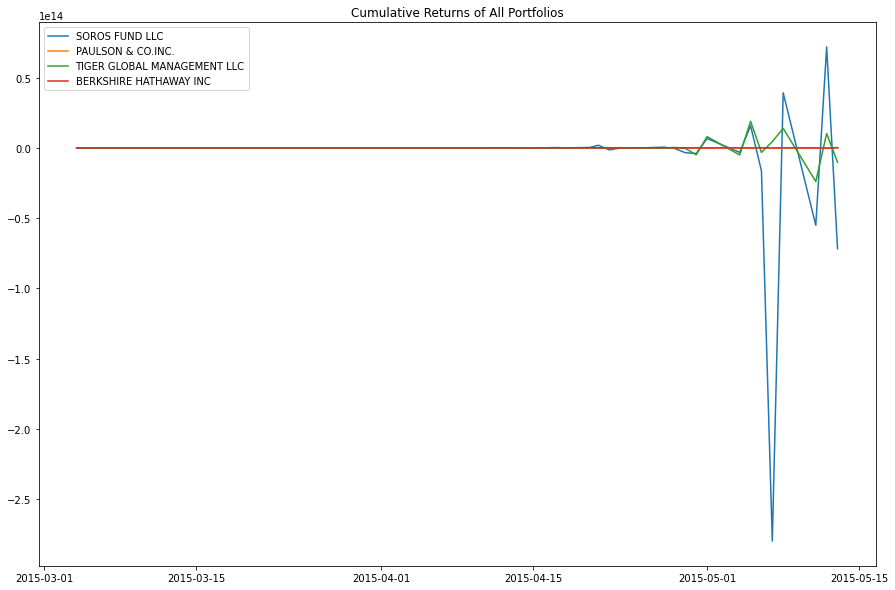

In [36]:
# Calculate cumulative returns of all portfolios
df_merged['SOROS FUND MANAGEMENT LLC Cumulative return']=df_merged['SOROS FUND MANAGEMENT LLC'].pct_change(1).cumprod()
df_merged['PAULSON & CO.INC.Cumulative return']=df_merged['PAULSON & CO.INC. '].pct_change(1).cumprod()
df_merged['TIGER GLOBAL MANAGEMENT LLC Cumulative return']=df_merged['TIGER GLOBAL MANAGEMENT LLC'].pct_change(1).cumprod()
df_merged['BERKSHIRE HATHAWAY INC Cumulative return']=df_merged['BERKSHIRE HATHAWAY INC'].pct_change(1).cumprod()

# Plot cumulative returns
plt.figure(figsize=(15,10))
plt.plot(df_merged['SOROS FUND MANAGEMENT LLC Cumulative return'],label="SOROS FUND LLC")
plt.plot(df_merged['PAULSON & CO.INC.Cumulative return'],label='PAULSON & CO.INC.')
plt.plot(df_merged['TIGER GLOBAL MANAGEMENT LLC Cumulative return'],label='TIGER GLOBAL MANAGEMENT LLC')
plt.plot(df_merged['BERKSHIRE HATHAWAY INC Cumulative return'],label='BERKSHIRE HATHAWAY INC')
plt.legend()
plt.title("Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [37]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of all Portfolios')

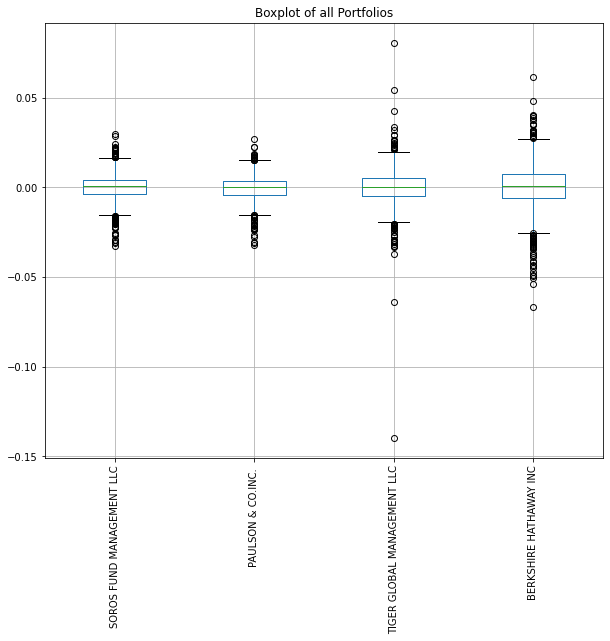

In [38]:
# Box plot to visually show risk
plt.figure(figsize=(10,8))
df_merged.loc[:,['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']].boxplot()
    
plt.xticks(rotation=90)
plt.title("Boxplot of all Portfolios")



### Calculate Standard Deviations

In [39]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return'],
      dtype='object')

In [40]:
# Calculate the daily standard deviations of all portfolios
print("SOROS FUND MANAGEMENT LLC Daily Standard Deviation:",df_merged["SOROS FUND MANAGEMENT LLC"].std())
print("PAULSON & CO.INC:",df_merged["PAULSON & CO.INC. "].std())
print('TIGER GLOBAL MANAGEMENT LLC',df_merged['TIGER GLOBAL MANAGEMENT LLC'].std())
print('BERKSHIRE HATHAWAY INC',df_merged['BERKSHIRE HATHAWAY INC'].std())


SOROS FUND MANAGEMENT LLC Daily Standard Deviation: 0.007827576541233951
PAULSON & CO.INC: 0.006982322574894719
TIGER GLOBAL MANAGEMENT LLC 0.010882785735819496
BERKSHIRE HATHAWAY INC 0.012825516031663223


### Determine which portfolios are riskier than the S&P TSX 60

In [41]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return'],
      dtype='object')

In [42]:
# Calculate  the daily standard deviation of S&P TSX 60
print("S&P TSX 60 DAily Standard Deviation:",df_merged["S&P TSX"].std())


# Determine which portfolios are riskier than the S&P TSX 60
print("SOROS FUND MANAGEMENT LLC Daily Standard Deviation:",df_merged["SOROS FUND MANAGEMENT LLC"].std())
print("PAULSON & CO.INC:",df_merged["PAULSON & CO.INC. "].std())
print('TIGER GLOBAL MANAGEMENT LLC',df_merged['TIGER GLOBAL MANAGEMENT LLC'].std())
print('BERKSHIRE HATHAWAY INC',df_merged['BERKSHIRE HATHAWAY INC'].std())

S&P TSX 60 DAily Standard Deviation: 0.007034167748577725
SOROS FUND MANAGEMENT LLC Daily Standard Deviation: 0.007827576541233951
PAULSON & CO.INC: 0.006982322574894719
TIGER GLOBAL MANAGEMENT LLC 0.010882785735819496
BERKSHIRE HATHAWAY INC 0.012825516031663223


The following funds are riskier than the S&P TSX 60:
- SOROS FUND MANAGEMENT LLC
- TIGER GLOBAL MANAGEMENT LLC
- BERKSHIRE HATHAWAY INC

In [43]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX,SOROS FUND MANAGEMENT LLC Cumulative return,PAULSON & CO.INC.Cumulative return,TIGER GLOBAL MANAGEMENT LLC Cumulative return,BERKSHIRE HATHAWAY INC Cumulative return
Date,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344,-2.212330,-0.425151,-7.936184,-0.979179
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972,6.567224,0.797940,36.521309,2.885917
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555,-7.050941,-1.741306,-61.681079,-2.521829
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628,-inf,inf,-inf,-inf
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254,inf,-inf,inf,-inf
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788,-inf,inf,-inf,inf


### Calculate the Annualized Standard Deviation

In [44]:
np.sqrt(100)

10.0

In [45]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return'],
      dtype='object')

In [46]:
# Calculate the annualized standard deviation (252 trading days)
print("SOROS FUND MANAGEMENT LLC Annualized Standard Deviation:",df_merged["SOROS FUND MANAGEMENT LLC"].std()*np.sqrt(252))
print("PAULSON & CO.INC. Annualized Standard Deviation:",df_merged["PAULSON & CO.INC. "].std()*np.sqrt(252))
print("TIGER GLOBAL MANAGEMENT LLC Annualized Standard Deviation:",df_merged["TIGER GLOBAL MANAGEMENT LLC"].std()*np.sqrt(252))
print("BERKSHIRE HATHAWAY INC Annualized Standard Deviation:",df_merged["BERKSHIRE HATHAWAY INC"].std()*np.sqrt(252))

SOROS FUND MANAGEMENT LLC Annualized Standard Deviation: 0.12425892537856896
PAULSON & CO.INC. Annualized Standard Deviation: 0.11084093464082155
TIGER GLOBAL MANAGEMENT LLC Annualized Standard Deviation: 0.17275886777147675
BERKSHIRE HATHAWAY INC Annualized Standard Deviation: 0.20359875513511738


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [47]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return'],
      dtype='object')

Text(0.5, 1.0, 'Rolling Standard Deviation of All Portfolios')

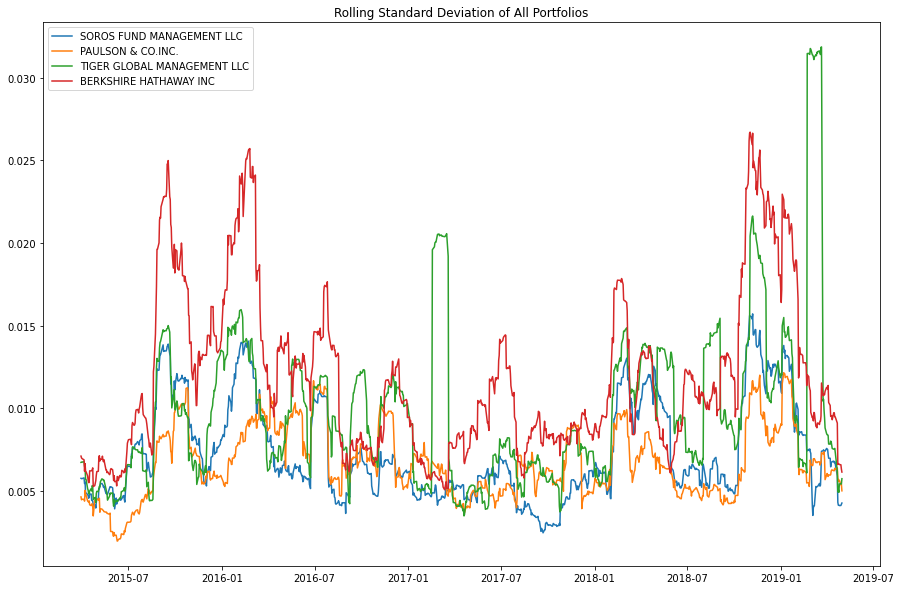

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_merged['SOROS FUND MANAGEMENT LLC Rolling Standard Deviation'] = df_merged["SOROS FUND MANAGEMENT LLC"].rolling(21).std()
df_merged['PAULSON & CO.INC. Rolling Standard Deviation'] = df_merged['PAULSON & CO.INC. '].rolling(21).std()
df_merged['TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation'] = df_merged['TIGER GLOBAL MANAGEMENT LLC'].rolling(21).std()
df_merged['BERKSHIRE HATHAWAY INC Rolling Standard Deviation'] = df_merged['BERKSHIRE HATHAWAY INC'].rolling(21).std()

#  Plot the rolling standard deviation
plt.figure(figsize=(15,10))
plt.plot(df_merged["SOROS FUND MANAGEMENT LLC Rolling Standard Deviation"], label="SOROS FUND MANAGEMENT LLC")
plt.plot(df_merged["PAULSON & CO.INC. Rolling Standard Deviation"], label="PAULSON & CO.INC. ")
plt.plot(df_merged["TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation"], label="TIGER GLOBAL MANAGEMENT LLC")
plt.plot(df_merged["BERKSHIRE HATHAWAY INC Rolling Standard Deviation"], label="BERKSHIRE HATHAWAY INC")
plt.legend(loc='best')
plt.title("Rolling Standard Deviation of All Portfolios")



### Calculate and plot the correlation

In [49]:
# Calculate the correlation
df_corr = df_merged.loc[:,["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]].corr()


# Display de correlation matrix
df_corr


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [50]:
df_merged.columns


Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return',
       'SOROS FUND MANAGEMENT LLC Rolling Standard Deviation',
       'PAULSON & CO.INC. Rolling Standard Deviation',
       'TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation',
       'BERKSHIRE HATHAWAY INC Rolling Standard Deviation'],
      dtype='object')

Text(0.5, 1.0, 'Beta Trend of SOROS FUND MANAGEMENT LLC')

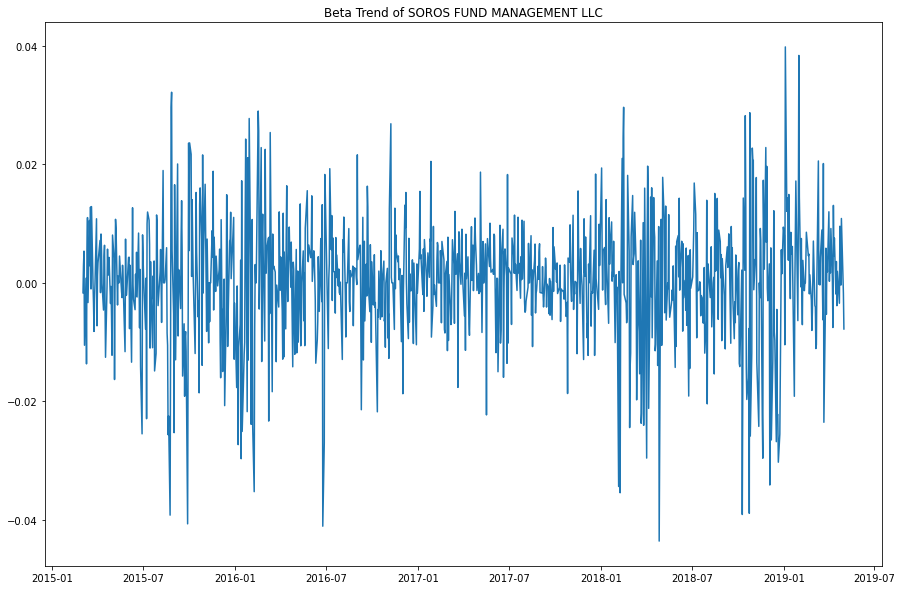

In [51]:
# Calculate covariance of a single portfolio


cov_soros = df_merged["SOROS FUND MANAGEMENT LLC"].cov(df_merged["S&P TSX"])


# Calculate variance of S&P TSX
sp_var = df_merged["S&P TSX"].var()

# Computing beta
beta = cov_soros / sp_var

 # Plot beta trend
plt.figure(figsize=(15,10))
plt.plot(df_merged["SOROS FUND MANAGEMENT LLC"]/beta)
plt.title("Beta Trend of SOROS FUND MANAGEMENT LLC")



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [52]:
df_merged.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Close', 'S&P TSX',
       'SOROS FUND MANAGEMENT LLC Cumulative return',
       'PAULSON & CO.INC.Cumulative return',
       'TIGER GLOBAL MANAGEMENT LLC Cumulative return',
       'BERKSHIRE HATHAWAY INC Cumulative return',
       'SOROS FUND MANAGEMENT LLC Rolling Standard Deviation',
       'PAULSON & CO.INC. Rolling Standard Deviation',
       'TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation',
       'BERKSHIRE HATHAWAY INC Rolling Standard Deviation'],
      dtype='object')

In [53]:
# Use `ewm` to calculate the rolling window
df_merged["SOROS FUND MANAGEMENT LLC Rolling EWMA"] = df_merged["SOROS FUND MANAGEMENT LLC"].ewm(span=21).mean()
df_merged["PAULSON & CO.INC. Rolling EWMA"] = df_merged["PAULSON & CO.INC. "].ewm(span=21).mean()
df_merged["TIGER GLOBAL MANAGEMENT LLC EWMA"] = df_merged["TIGER GLOBAL MANAGEMENT LLC"].ewm(span=21).mean()
df_merged["BERKSHIRE HATHAWAY INC EWMA"] = df_merged["BERKSHIRE HATHAWAY INC"].ewm(span=12).mean()


In [54]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX,SOROS FUND MANAGEMENT LLC Cumulative return,PAULSON & CO.INC.Cumulative return,TIGER GLOBAL MANAGEMENT LLC Cumulative return,BERKSHIRE HATHAWAY INC Cumulative return,SOROS FUND MANAGEMENT LLC Rolling Standard Deviation,PAULSON & CO.INC. Rolling Standard Deviation,TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation,BERKSHIRE HATHAWAY INC Rolling Standard Deviation,SOROS FUND MANAGEMENT LLC Rolling EWMA,PAULSON & CO.INC. Rolling EWMA,TIGER GLOBAL MANAGEMENT LLC EWMA,BERKSHIRE HATHAWAY INC EWMA
Date,,,,,,,,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371,-2.762070,-1.650792,4.113646,-1.641381,NaN,NaN,NaN,NaN,0.000565,-0.000674,-0.001563,-0.000729
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344,-2.212330,-0.425151,-7.936184,-0.979179,NaN,NaN,NaN,NaN,0.001827,0.001063,-0.000131,0.002181
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972,6.567224,0.797940,36.521309,2.885917,NaN,NaN,NaN,NaN,-0.000964,-0.000267,-0.002526,-0.002642
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555,-7.050941,-1.741306,-61.681079,-2.521829,NaN,NaN,NaN,NaN,-0.000593,0.000810,-0.000519,-0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628,-inf,inf,-inf,-inf,0.004145,0.005572,0.004917,0.006641,0.001590,-0.000272,-0.000369,0.001884
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254,inf,-inf,inf,-inf,0.004117,0.005649,0.005424,0.006599,0.002186,0.000585,0.000788,0.003200
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788,-inf,inf,-inf,inf,0.004123,0.005374,0.005438,0.006584,0.002102,0.000779,0.001285,0.003511


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Annualized Sharpe Ratios
sharpe_ratios = df_merged.loc[:,["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]].mean() / df_merged.loc[:,["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]].std() * np.sqrt(252)


In [56]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

Text(0, 0.5, 'Sharpe Ratio')

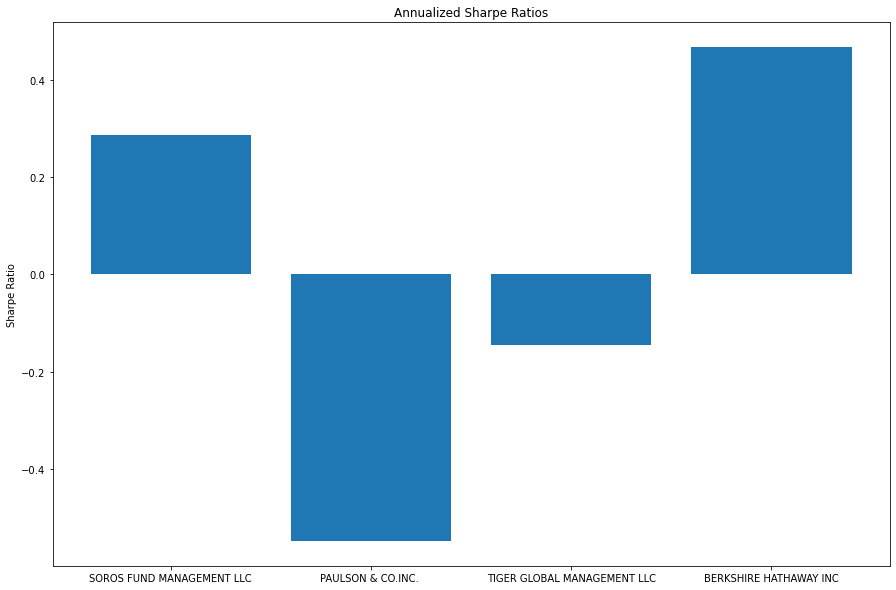

In [57]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(15,10))
plt.bar(sharpe_ratios.index, sharpe_ratios)
plt.title("Annualized Sharpe Ratios")
plt.ylabel("Sharpe Ratio")


In [58]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX,SOROS FUND MANAGEMENT LLC Cumulative return,PAULSON & CO.INC.Cumulative return,TIGER GLOBAL MANAGEMENT LLC Cumulative return,BERKSHIRE HATHAWAY INC Cumulative return,SOROS FUND MANAGEMENT LLC Rolling Standard Deviation,PAULSON & CO.INC. Rolling Standard Deviation,TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation,BERKSHIRE HATHAWAY INC Rolling Standard Deviation,SOROS FUND MANAGEMENT LLC Rolling EWMA,PAULSON & CO.INC. Rolling EWMA,TIGER GLOBAL MANAGEMENT LLC EWMA,BERKSHIRE HATHAWAY INC EWMA
Date,,,,,,,,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371,-2.762070,-1.650792,4.113646,-1.641381,NaN,NaN,NaN,NaN,0.000565,-0.000674,-0.001563,-0.000729
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344,-2.212330,-0.425151,-7.936184,-0.979179,NaN,NaN,NaN,NaN,0.001827,0.001063,-0.000131,0.002181
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972,6.567224,0.797940,36.521309,2.885917,NaN,NaN,NaN,NaN,-0.000964,-0.000267,-0.002526,-0.002642
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555,-7.050941,-1.741306,-61.681079,-2.521829,NaN,NaN,NaN,NaN,-0.000593,0.000810,-0.000519,-0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628,-inf,inf,-inf,-inf,0.004145,0.005572,0.004917,0.006641,0.001590,-0.000272,-0.000369,0.001884
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254,inf,-inf,inf,-inf,0.004117,0.005649,0.005424,0.006599,0.002186,0.000585,0.000788,0.003200
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788,-inf,inf,-inf,inf,0.004123,0.005374,0.005438,0.006584,0.002102,0.000779,0.001285,0.003511


In [59]:
sharpe_algo1 = df_merged["Algo 1"].mean() / df_merged["Algo 1"].std() * np.sqrt(252)
sharpe_algo2 = df_merged["Algo 2"].mean() / df_merged["Algo 2"].std() * np.sqrt(252)
sp_sharpe = df_merged["S&P TSX"].mean() / df_merged["S&P TSX"].std() * np.sqrt(252)


In [60]:
sharpe_algo1,sharpe_algo2,sp_sharpe

(1.4915139113899518, 0.3968171638196936, 0.19555028784301404)

In [61]:
df_merged

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX,SOROS FUND MANAGEMENT LLC Cumulative return,PAULSON & CO.INC.Cumulative return,TIGER GLOBAL MANAGEMENT LLC Cumulative return,BERKSHIRE HATHAWAY INC Cumulative return,SOROS FUND MANAGEMENT LLC Rolling Standard Deviation,PAULSON & CO.INC. Rolling Standard Deviation,TIGER GLOBAL MANAGEMENT LLC Rolling Standard Deviation,BERKSHIRE HATHAWAY INC Rolling Standard Deviation,SOROS FUND MANAGEMENT LLC Rolling EWMA,PAULSON & CO.INC. Rolling EWMA,TIGER GLOBAL MANAGEMENT LLC EWMA,BERKSHIRE HATHAWAY INC EWMA
Date,,,,,,,,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371,-2.762070,-1.650792,4.113646,-1.641381,NaN,NaN,NaN,NaN,0.000565,-0.000674,-0.001563,-0.000729
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344,-2.212330,-0.425151,-7.936184,-0.979179,NaN,NaN,NaN,NaN,0.001827,0.001063,-0.000131,0.002181
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972,6.567224,0.797940,36.521309,2.885917,NaN,NaN,NaN,NaN,-0.000964,-0.000267,-0.002526,-0.002642
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555,-7.050941,-1.741306,-61.681079,-2.521829,NaN,NaN,NaN,NaN,-0.000593,0.000810,-0.000519,-0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628,-inf,inf,-inf,-inf,0.004145,0.005572,0.004917,0.006641,0.001590,-0.000272,-0.000369,0.001884
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254,inf,-inf,inf,-inf,0.004117,0.005649,0.005424,0.006599,0.002186,0.000585,0.000788,0.003200
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788,-inf,inf,-inf,inf,0.004123,0.005374,0.005438,0.006584,0.002102,0.000779,0.001285,0.003511


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo1 has outperformed all the whale investment portfolios and the S&P TSX 60 index
Algo2 had outperfomed all whale porfolios except Bershire Hathaway LLC and also the S&P TSX 60 index

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [62]:
# Reading data from 1st stock
google=pd.read_csv("Resources/google.csv")


In [63]:
# Reading data from 2nd stock
apple=pd.read_csv("Resources/aapl.csv")

In [64]:
# Reading data from 3rd stock
bhp=pd.read_csv("Resources/bhp.csv")


In [65]:
#Rename Close to corresponsing stock names
google.rename(columns={"Close": "Google"}, inplace=True)
apple.rename(columns={"Close": "Apple"}, inplace=True)
bhp.rename(columns={"Close": "BHP"}, inplace=True)



In [66]:
# Combine all stocks in a single DataFrame
df_stocks = pd.merge(google, apple, on="Date")
df_stocks= pd.merge(df_stocks, bhp, on="Date")


In [67]:
df_stocks

,Date,Google,Apple,BHP
0,1/2/2015 16:00:00,523.37,27.33,27.60
1,1/5/2015 16:00:00,512.46,26.56,27.55
2,1/6/2015 16:00:00,500.59,26.57,26.27
3,1/7/2015 16:00:00,499.73,26.94,26.27
4,1/8/2015 16:00:00,501.30,27.97,26.52
...,...,...,...,...
1219,12/19/2019 16:00:00,1356.04,70.01,39.79
1220,12/20/2019 16:00:00,1349.59,69.86,39.72
1221,12/23/2019 16:00:00,1348.84,71.00,39.22
1222,12/27/2019 16:00:00,1351.89,72.45,39.64


In [68]:
# Reset Date index
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"])
df_stocks.reset_index(inplace=True, drop=True)


In [69]:
# Reorganize portfolio data by having a column per symbol
df_portfolio = df_stocks.loc[:,["Date", "Google", "Apple", "BHP"]]


In [70]:
df_stocks

,Date,Google,Apple,BHP
0,2015-01-02 16:00:00,523.37,27.33,27.60
1,2015-01-05 16:00:00,512.46,26.56,27.55
2,2015-01-06 16:00:00,500.59,26.57,26.27
3,2015-01-07 16:00:00,499.73,26.94,26.27
4,2015-01-08 16:00:00,501.30,27.97,26.52
...,...,...,...,...
1219,2019-12-19 16:00:00,1356.04,70.01,39.79
1220,2019-12-20 16:00:00,1349.59,69.86,39.72
1221,2019-12-23 16:00:00,1348.84,71.00,39.22
1222,2019-12-27 16:00:00,1351.89,72.45,39.64


In [71]:
# Calculate daily returns
df_portfolio["Daily Return Google"] = df_portfolio["Google"].pct_change()
df_portfolio["Daily Return Apple"] = df_portfolio["Apple"].pct_change()
df_portfolio["Daily Return BHP"] = df_portfolio["BHP"].pct_change()

# Drop NAs
df_portfolio.dropna(inplace=True)
# Display sample data
df_portfolio.sample(10)

,Date,Google,Apple,BHP,Daily Return Google,Daily Return Apple,Daily Return BHP
476,2016-12-05 16:00:00,762.52,27.28,25.18,0.016016,-0.007278,0.006395
855,2018-06-25 16:00:00,1124.81,45.54,32.98,-0.026543,-0.014925,0.014145
329,2016-05-05 16:00:00,701.43,23.31,18.43,0.008236,-0.010191,-0.019159
297,2016-03-17 16:00:00,737.78,26.45,17.29,0.002296,-0.001510,0.024289
435,2016-10-06 16:00:00,776.86,28.47,23.12,0.000502,0.007431,0.011816
232,2015-12-09 16:00:00,751.61,28.91,17.16,-0.014114,-0.021989,0.006452
529,2017-02-24 16:00:00,828.64,34.17,25.06,-0.003236,0.001172,-0.030186
779,2018-03-02 16:00:00,1078.92,44.05,29.63,0.008789,0.006857,-0.015615
555,2017-04-03 16:00:00,838.55,35.92,24.00,0.010837,0.000000,-0.001664
1042,2019-04-02 16:00:00,1200.49,48.51,39.03,0.005074,0.014641,-0.000512


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
df_portfolio["Portfolio Return"] = df_portfolio.loc[:,["Daily Return Google", "Daily Return Apple", "Daily Return BHP"]].dot(weights)

# Display sample data
df_portfolio.sample(10)


,Date,Google,Apple,BHP,Daily Return Google,Daily Return Apple,Daily Return BHP,Portfolio Return
188,2015-10-07 16:00:00,642.36,27.70,24.26,-0.004772,-0.004671,0.015913,0.002157
313,2016-04-12 16:00:00,743.09,27.61,16.90,0.009496,0.012839,0.021148,0.014494
715,2017-11-22 16:00:00,1035.96,43.74,27.60,0.001421,0.010395,0.013588,0.008468
703,2017-11-06 16:00:00,1025.90,43.56,27.67,-0.006373,0.009970,-0.000722,0.000958
1006,2019-02-08 16:00:00,1095.06,42.60,35.33,-0.003322,-0.003276,-0.015054,-0.007217
899,2018-08-28 16:00:00,1231.15,54.93,33.38,-0.008592,0.008075,0.009069,0.002851
30,2015-02-18 16:00:00,538.22,32.18,30.82,-0.005782,0.006884,0.013149,0.004750
61,2015-04-02 16:00:00,534.06,31.33,28.24,-0.012956,0.008693,-0.003880,-0.002714
1182,2019-10-25 16:00:00,1265.13,61.65,35.77,0.003283,0.012315,0.000559,0.005386
860,2018-07-02 16:00:00,1127.46,46.80,33.60,0.010586,0.011236,-0.009142,0.004227


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame
df_merged.reset_index(inplace=True)
df_portfolio["Date"] = df_portfolio["Date"].dt.date
df_portfolio["Date"] = pd.to_datetime(df_portfolio["Date"])
df_combined = pd.merge(df_merged, df_portfolio, on="Date")


In [74]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combined=df_combined.dropna()

In [75]:
df_combined

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,S&P TSX,SOROS FUND MANAGEMENT LLC Cumulative return,...,PAULSON & CO.INC. Rolling EWMA,TIGER GLOBAL MANAGEMENT LLC EWMA,BERKSHIRE HATHAWAY INC EWMA,Google,Apple,BHP,Daily Return Google,Daily Return Apple,Daily Return BHP,Portfolio Return
20,2015-03-31,-0.005445,-0.003021,-0.003968,0.001858,0.002325,-0.003281,14902.44,-0.000399,-2.359980e+08,...,-0.000027,0.000450,0.000925,546.50,31.11,29.00,-0.007302,-0.015195,0.030928,0.002810
21,2015-04-01,0.000919,0.000157,-0.002002,-0.003865,-0.002956,0.003005,14942.55,0.002692,2.758119e+08,...,-0.000008,0.000196,0.000169,541.07,31.06,28.35,-0.009936,-0.001607,-0.022414,-0.011319
22,2015-04-02,0.002561,0.004299,0.003058,0.001966,0.000881,0.004874,15026.62,0.005626,4.932833e+08,...,0.000433,0.000489,0.000451,534.06,31.33,28.24,-0.012956,0.008693,-0.003880,-0.002714
23,2015-04-07,-0.001243,-0.000171,-0.002060,0.001882,0.001992,-0.002593,15188.84,0.005840,-6.655884e+08,...,0.000676,0.000611,0.001266,535.55,31.50,28.45,0.002790,0.005426,0.007436,0.005217
24,2015-04-08,0.006185,0.012652,0.003452,0.012352,0.006402,0.003734,15213.60,0.001630,3.978755e+09,...,0.001864,0.000893,0.002994,540.13,31.40,28.72,0.008552,-0.003175,0.009490,0.004956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,16586.52,-0.004972,inf,...,-0.000170,0.000110,0.001346,1256.00,51.79,38.20,-0.006761,-0.001542,-0.003392,-0.003898
1002,2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254,inf,...,0.000585,0.000788,0.003200,1272.18,51.08,37.60,0.012882,-0.013709,-0.015707,-0.005511
1003,2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788,-inf,...,0.000779,0.001285,0.003511,1287.58,51.15,37.82,0.012105,0.001370,0.005851,0.006442
1004,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,16580.73,-0.001183,inf,...,0.000507,0.001144,0.002401,1188.48,50.17,37.40,-0.076966,-0.019159,-0.011105,-0.035744


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized `std`
df_combined["Annualized Return"] = df_combined["Portfolio Return"].std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

In [77]:
# Calculate rolling standard deviation
df_combined["Rolling Annualized Return"] = df_combined["Portfolio Return"].rolling(21).std() * np.sqrt(252)
df_combined.set_index("Date", inplace=True)




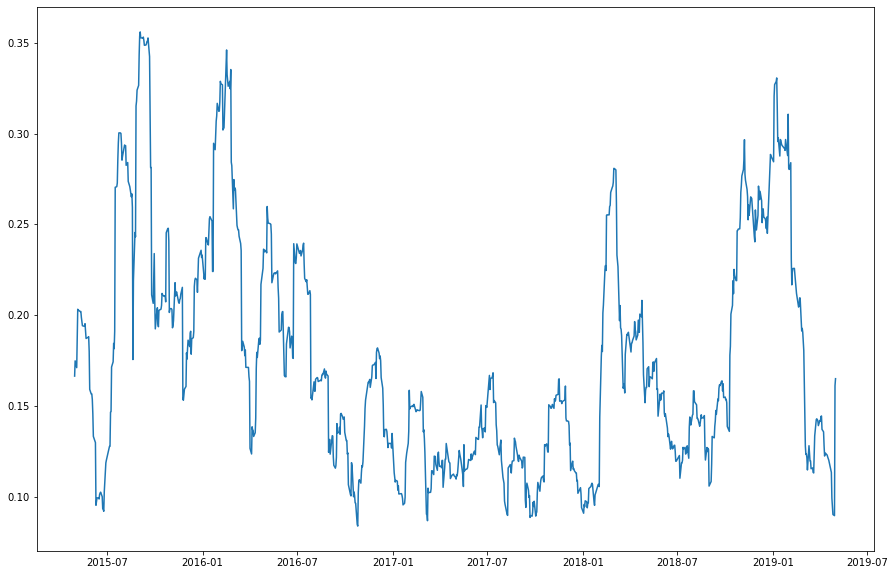

In [78]:
# Plot rolling standard deviation
plt.figure(figsize=(15,10))
plt.plot(df_combined["Rolling Annualized Return"])


In [79]:
df_combined.shape

(973, 29)

### Calculate and plot the correlation

In [80]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

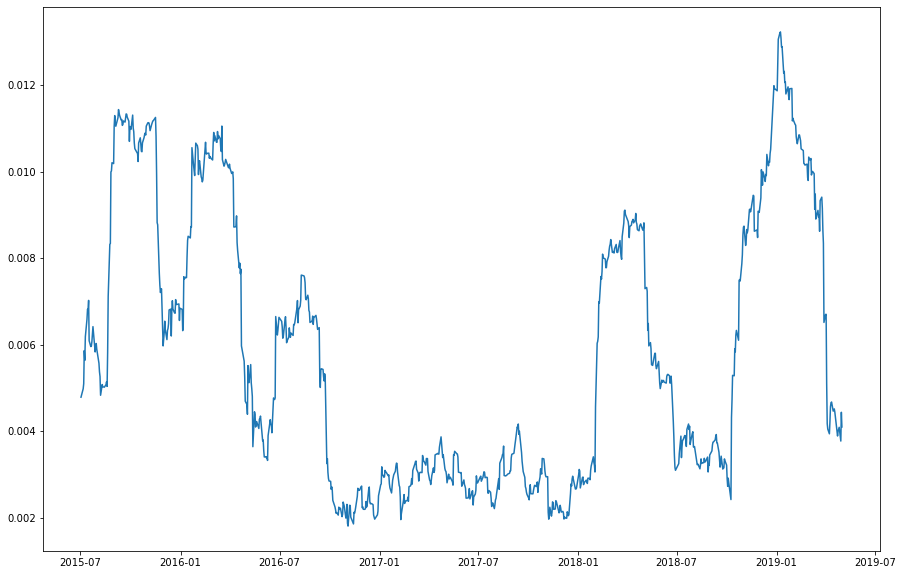

In [81]:
# Calculate and plot Beta
df_combined["Rolling Beta"] = df_combined["Portfolio Return"].rolling(60).cov(df_combined["S&P TSX"]) / df_combined["S&P TSX"].rolling(60).std()


# Plot rolling beta
plt.figure(figsize=(15,10))
plt.plot(df_combined["Rolling Beta"])



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = df_combined.loc[:,["S&P TSX", "Google", "Apple", "BHP"]].mean() / df_combined.loc[:,["S&P TSX", "Google", "Apple", "BHP"]].std() * np.sqrt(252)


<BarContainer object of 4 artists>

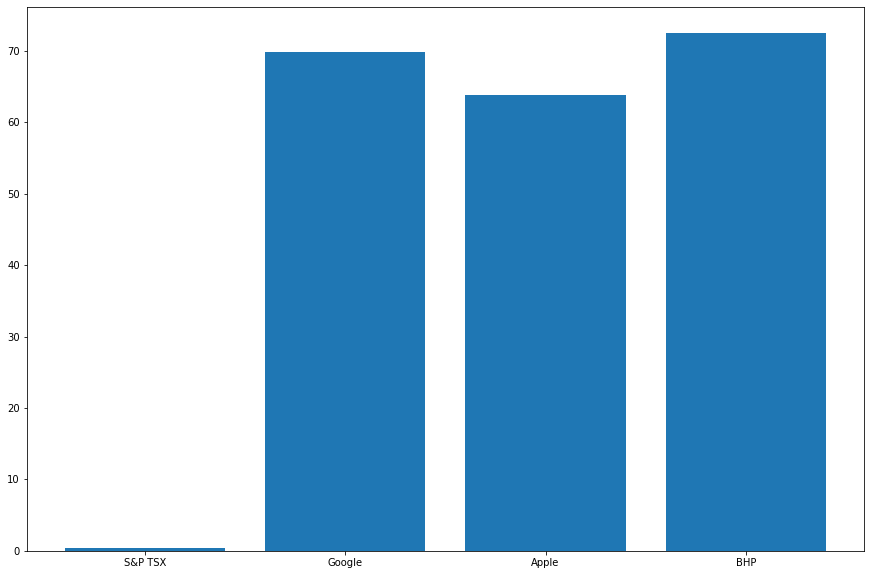

In [83]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(15,10))
plt.bar(sharpe_ratios.index, sharpe_ratios)


### How does your portfolio do?

By comparing the sharpe values to the S&P TSX60 and whale portfolios, my portfolio has outperformed as well as showing a positive Beta to the S&P TSX60 over the period of 4 years.